In [1]:
import pandas as pd
import requests 
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
#from bs4 import BeautifulSoup

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = json.loads(data.content)

In [5]:
data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
data['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 65},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 214},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 237},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

In [7]:
def get_entry_personal_data(entry_id):
    """ Retrieve the summary/history data for a specific entry/team
    Args:
        entry_id (int) : ID of the team whose data is to be retrieved
    """
    base_url = "https://fantasy.premierleague.com/api/entry/"
    full_url = base_url + str(entry_id) + "/"
    response = ''
    while response == '':
        try:
            response = requests.get(full_url)
        except:
            time.sleep(5)
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    data = json.loads(response.text)
    return data

In [8]:
def get_entry_data(entry_id):
    """ Retrieve the summary/history data for a specific entry/team
    Args:
        entry_id (int) : ID of the team whose data is to be retrieved
    """
    base_url = "https://fantasy.premierleague.com/api/entry/"
    full_url = base_url + str(entry_id) + "/history/"
    response = ''
    while response == '':
        try:
            response = requests.get(full_url)
        except:
            time.sleep(5)
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    data = json.loads(response.text)
    return data

In [76]:
def total_points_plotter(entry_ids=entry_list):
    plt.figure(figsize=(8,4))
    plt.title("TOTAL POINTS")
    for entry in entry_ids:
        personal_data=get_entry_personal_data(entry)
        f_name=personal_data['player_first_name']
        l_name=personal_data['player_last_name']
        name=f_name+" "+l_name
        current_data=get_entry_data(entry)['current']
        df_current=pd.DataFrame(current_data)
        #print(name)
        sns.lineplot(data=df_current, x='event', y='total_points', label=name)
    gw=np.arange(1,df_current.event.max()+1)
    plt.xlabel('Game Week')
    plt.ylabel("Total Points")
    plt.grid(axis='y')
    plt.legend()
    plt.xticks(gw)
    plt.tight_layout()
    plt.show()

In [78]:
def gw_points_plotter(entry_ids=entry_list):
    plt.figure(figsize=(8,4))
    plt.title("GAMEWEEK POINTS")
    alpha_dict={0:0.8,1:0.5}
    color_dict={0:'blue',1:'red'}
    for i,entry in enumerate(entry_ids):
        personal_data=get_entry_personal_data(entry)
        f_name=personal_data['player_first_name']
        l_name=personal_data['player_last_name']
        name=f_name+" "+l_name
        current_data=get_entry_data(entry)['current']
        df_current=pd.DataFrame(current_data)
        #print(name)
        sns.lineplot(x='event', y='points',data=df_current, color=color_dict[i], 
                label=name)
    gw=np.arange(1,df_current.event.max()+1)
    plt.xlabel('Game Week')
    plt.ylabel("Gameweek Points")
    plt.grid(axis='y')
    plt.ylim(bottom=0)
    plt.legend()
    plt.xticks(gw)
    plt.tight_layout()
    plt.show()

In [82]:
def gw_rank_plotter(entry_ids=entry_list):
    plt.figure(figsize=(8,4))
    plt.title("GAMEWEEK RANK")
    alpha_dict={0:0.8,1:0.5}
    color_dict={0:'blue',1:'red'}
    for i,entry in enumerate(entry_ids):
        personal_data=get_entry_personal_data(entry)
        f_name=personal_data['player_first_name']
        l_name=personal_data['player_last_name']
        name=f_name+" "+l_name
        current_data=get_entry_data(entry)['current']
        df_current=pd.DataFrame(current_data)
        #print(name)
        sns.lineplot(x='event', y='rank',data=df_current, color=color_dict[i], 
                label=name)
    gw=np.arange(1,df_current.event.max()+1)
    plt.xlabel('Game Week')
    plt.ylabel("Gameweek Rank")
    plt.grid(axis='y')
    plt.ylim(bottom=0)
    plt.legend()
    plt.xticks(gw)
    plt.tight_layout()
    plt.show()

In [83]:
def overall_rank_plotter(entry_ids=entry_list):
    plt.figure(figsize=(8,4))
    plt.title("OVERALL RANK")
    alpha_dict={0:0.8,1:0.5}
    color_dict={0:'blue',1:'red'}
    for i,entry in enumerate(entry_ids):
        personal_data=get_entry_personal_data(entry)
        f_name=personal_data['player_first_name']
        l_name=personal_data['player_last_name']
        name=f_name+" "+l_name
        current_data=get_entry_data(entry)['current']
        df_current=pd.DataFrame(current_data)
        #print(name)
        sns.lineplot(x='event', y='overall_rank',data=df_current, color=color_dict[i], 
                label=name)
    gw=np.arange(1,df_current.event.max()+1)
    plt.xlabel('Game Week')
    plt.ylabel("Overall Rank")
    plt.grid(axis='y')
    plt.ylim(bottom=0)
    plt.legend()
    plt.xticks(gw)
    plt.tight_layout()
    plt.show()

In [95]:
plt.style.use("default")

Enter your Entry ID :1
Enter competitor Entry ID :5


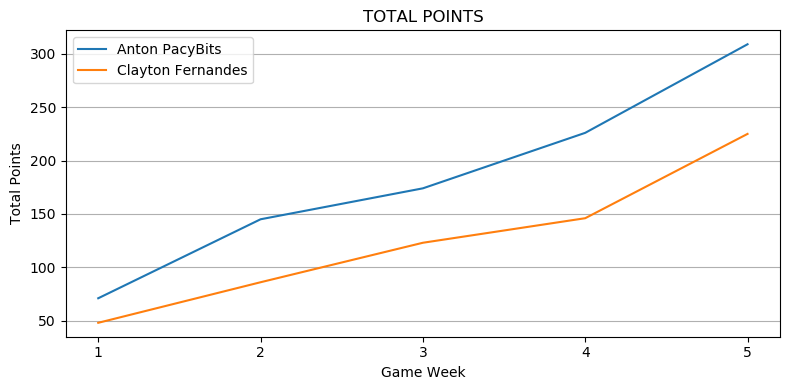

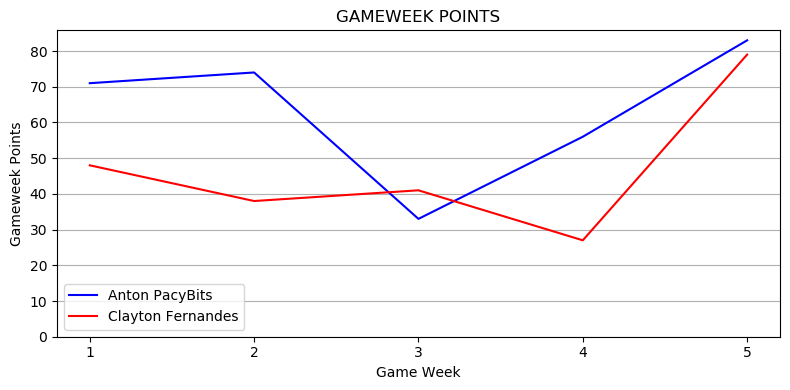

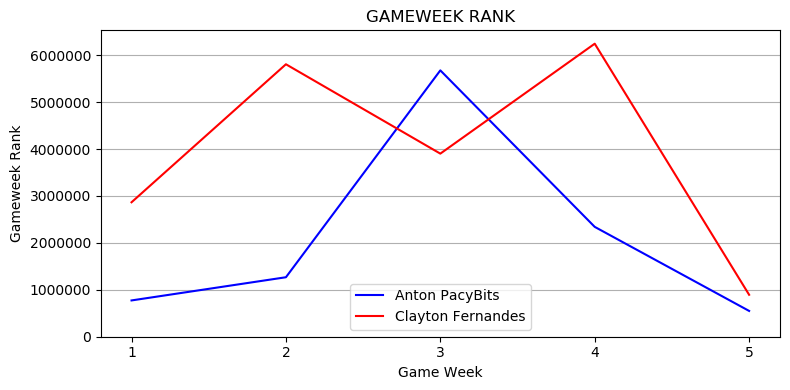

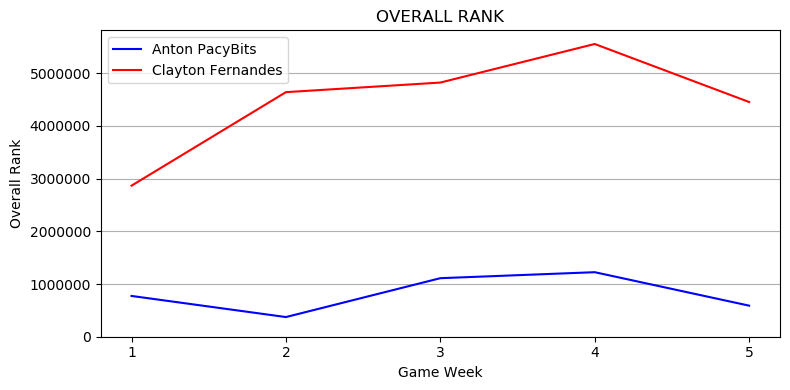

In [96]:
entry_list=[]
entry_list.append(input("Enter your Entry ID :"))
entry_list.append(input("Enter competitor Entry ID :"))
total_points_plotter(entry_list)
gw_points_plotter(entry_list)
gw_rank_plotter(entry_list)
overall_rank_plotter(entry_list)